In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import plotly.express as px
import numpy as np
from db_api import get_cal, get_metadata_all

In [2]:
BASE_URL = "https://db.whoifloatgroup.org"
#BASE_URL = "http://127.0.0.1:8000"

headers = {'Content-Type':'application/json'}

def get_wmo_assigned(PLATFORM_TYPE):
    response = requests.get(BASE_URL+"/api/wmo_assigned", headers=headers,
            params={"PLATFORM_TYPE":PLATFORM_TYPE})
    
    if response.status_code==200:
        return pd.DataFrame(json.loads(response.content))
    raise Exception('ERROR: ', response.status_code)

PLATFORMTYPE = "&PLATFORM_TYPE=NAVIS_EBR"

def get_cal2(floatnum):
    floatnum = "FLOAT_SERIAL_NO=" + str(floatnum) + PLATFORMTYPE
    response = requests.get(BASE_URL+"/api/cal?"+floatnum)

    if response.status_code==200:
        return pd.DataFrame(json.loads(response.content))
    raise Exception('ERROR: ', response.status_code)


In [3]:
sn = get_metadata_all("FLOAT_SERIAL_NO")
WMO = get_metadata_all("PLATFORM_NUMBER")

df = pd.concat([sn, WMO], axis=1)
df

,FLOAT_SERIAL_NO,PLATFORM_NUMBER
0,1528,8
1,1343,4903456
2,1529,29
3,1530,None
4,1477,4903533
5,1539,None
6,1475,4903489
7,1476,4903532
8,1359,4903462
9,1361,4903487


In [4]:
flts = get_wmo_assigned("NAVIS_EBR")
sn = flts.FLOAT_SERIAL_NO
sn

0     1528
1     1343
2     1529
3     1477
4     1475
5     1476
6     1359
7     1361
8     1474
9     1360
10    1486
11    1487
12    1344
13    1482
14    1483
15    1484
16    1485
17    1488
18    1489
19    1490
20    1203
21    1358
22    1357
23    1356
24    1345
25    1346
26    1351
27    1201
28    1347
29    1348
30    1355
31    1354
32    1352
33    1200
34    1349
35    1350
36    1353
Name: FLOAT_SERIAL_NO, dtype: object

In [5]:
meta = []
for sns in (sn):
    df = get_cal2(sns)
    meta.append(df)
meta

display(meta[0])

,CTD_CNDC,CTD_PRES,CTD_TEMP,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,DRUCK,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE41CP_V5.3.5,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18947,12263199,18947,3419,419,419,419,2068,720-12256
SENSOR_CALIB_DATE,2023-03-12,2023-03-16,2023-03-12,2023-03-08,None,None,None,None,2023-03-14
COMMENTS,None,None,None,None,,,,None,REF SN: 12246; added calibration date; added K0
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01677, 'H': 0.1431673, 'I': -0.000169...","{'PA0': 0.2982393, 'PA1': 0.0003909299, 'PA2':...","{'TA0': -0.0008992448, 'TA1': 0.0003029106, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084}","{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002349}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.00022323, 0.00585584, 0.00472827, ...","{'F0': -1.332894357998, 'F1': 8.811211536684e-..."


In [6]:
cal = []
for i, metas in enumerate(meta):
    cal.append(metas["FLUOROMETER_CDOM"].PREDEPLOYMENT_CALIB_COEFFICIENT)
cal

[{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.01218},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.0378},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006736},
 {'DARK_CDOM': 49, 'SCALE_CDOM': 0.006766},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006727},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006681},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006836},
 {'DARK_CDOM': 49, 'SCALE_CDOM': 0.007169},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006837},
 {'DARK_CDOM': 49, 'SCALE_CDOM': 0.006724},
 {'DARK_CDOM': 49, 'SCALE_CDOM': 0.007122},
 {'DARK_CDOM': None, 'SCALE_CDOM': None},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.007144},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006925},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.006577},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.00666},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.00565},
 {'DARK_CDOM': 49, 'SCALE_CDOM': 0.005626},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.005679},
 {'DARK_CDOM': 50.0, 'SCALE_CDOM': 0.007514},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.007968},
 {'DARK_CDOM': 50, 'SCALE_CDOM': 0.009

DARK_CDOM
The mean is: 49.80555555555556
The std is: 0.3957724124659723
SCALE_CDOM
The mean is: 0.00941313888888889
The std is: 0.007446472666649246


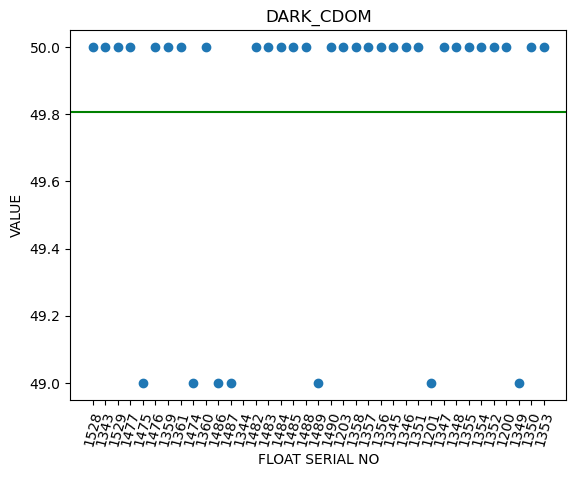

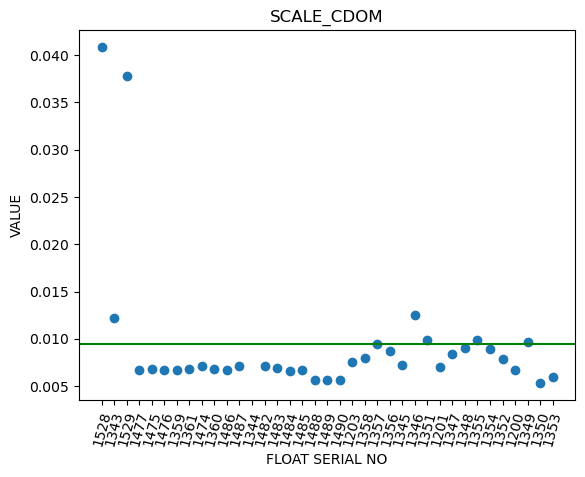

In [7]:
variables = ["DARK_CDOM","SCALE_CDOM"]
counter = 0

for variable in variables:
    coefficients = []
    serials = []
    counter2 = 0
    for num in cal: 
        if variable in num:
            coefficients.append(num[variable])
            serials.append(sn[counter2])
        counter2+=1
    
    coefficient_array = np.array(coefficients)
    coeff_array = np.delete(coefficient_array, np.where(coefficient_array == None))
    #print(coeff_array)
    print(variable)
    mean = coeff_array.mean()
    std = coeff_array.std()
    print("The mean is:", coeff_array.mean())
    print("The std is:", coeff_array.std())

    plt.figure(counter)
    plt.xlabel("FLOAT SERIAL NO")
    plt.ylabel("VALUE")
    plt.title(variable)
    plt.scatter(serials,coefficients)
    plt.axhline(y = mean, color='green')
    #plt.axhline(y = std, color= 'red')
    plt.xticks(rotation= 75)
    counter+=1